# census mapping

## setup

In [4]:
#IMPORT REQUIRED PACKAGES

import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt 

# !pip install adjustText
# THIS PACKAGE HELPS TO AUTOMATICALLY REPOSITION MAP LABELLING
import adjustText as aT

In [5]:
#CREATE INTERNAL DIRECTORY 

!mkdir "{data_dir}/external/ons/datasets"

A subdirectory or file ../data/external/ons/datasets already exists.


In [6]:
# Used as root folder.
project_dir = '..'

data_dir = f"{project_dir}/data"

# Used as output folder for all boundary files and centroid files.
boundaries_dir = f"{data_dir}/external/ons/boundaries"

# Used as output folder for all lookup tables.
lookup_dir = f"{data_dir}/external/ons/lookups"

# Used as output folder for all lookup tables.
ons_datasets_dir = f"{data_dir}/external/ons/datasets"

_this notebook assumes that some datafiles (namely spatial boundaries and lookups) are available in the current project structure)_

the boundary datafiles are available in this project via version control, but it is arguably good practice to not version public data that is available online already 

msoa boundaries
--

In [7]:
#READ IN 2021 TOWER HAMLETS MSOA BOUNDARIES 

msoa_gdf=gpd.read_file('https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/MSOA_2021_EW_BFC_V2/FeatureServer/0/query?where=MSOA21NM+like+%27Tower+Hamlets%25%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token=',driver='GeoJSON')

## lsoa boundaries

In [8]:
#READ IN 2011 LSOA TOWER HAMLETS BOUNDARIES

gdf_2011 = gpd.read_file("https://gist.github.com/joel-lbth/f2d748b99ee7bfe43384d1a80694038a/raw/5ea02c312cc712ca7e74c818148e7ed47e3e4c90/lbth_lsoa11_full.geojson")

In [9]:
#READ IN 2021 LSOA TOWER HAMLETS BOUNDARIES

gdf = gpd.read_file('https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/LSOA_2021_EW_BFC_V2/FeatureServer/0/query?where=LSOA21NM+like+%27Tower+Hamlets%25%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=LSOA21CD&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=5&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token=', driver="GeoJSON")

## lsoa lookups

In [10]:
#IMPORT 2011 vs 2021 LSOA lookup

lsoa_2011_2022_lookup = pd. read_csv("https://opendata.arcgis.com/api/v3/datasets/15299a7b8e6c498d94a08b687c75b73f_0/downloads/data?format=csv&spatialRefId=4326&where=1%3D1")

In [11]:
#IMPORT LSOA TO WARD LOOKUP 

lsoa_to_ward = pd.read_excel("https://www.arcgis.com/sharing/rest/content/items/ceeba47c2ff74786b650eb59c507e58c/data")

## ward boundaries

In [50]:
#IMPORT 2022 TOWER HAMLETS WARD BOUNDARIES

wd22 = gpd.read_file("https://tow-azs-p-gis01.towerhamlets.gov.uk/server/rest/services/Corporate_Data/Ward_Boundary/FeatureServer/0/query?where=1%3D1&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&maxAllowableOffset=&geometryPrecision=&outSR=&having=&gdbVersion=&historicMoment=&returnDistinctValues=false&returnIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&multipatchOption=xyFootprint&resultOffset=&resultRecordCount=&returnTrueCurves=false&returnExceededLimitFeatures=false&quantizationParameters=&returnCentroid=false&sqlFormat=none&resultType=&featureEncoding=esriDefault&f=geojson")

In [53]:
# EXAMINE THE WARD NAMES

wd22.apply(lambda x: print(x['NAME'], x.geometry.centroid.coords[0]), axis=1)

Canary Wharf (-0.022469390879946507, 51.50161156453551)
Weavers (-0.07043399086724493, 51.52672554950845)
Bethnal Green West (formally St Peters) (-0.05876530996648077, 51.528977076102414)
Poplar (-0.011396877266274414, 51.51003539520034)
Lansbury (-0.010928914148078315, 51.515305298343286)
Bromley North (-0.017756200268725056, 51.52640327534285)
Bethnal Green East (formally Bethnal Green) (-0.0478129855223993, 51.526382928418954)
Shadwell (-0.05201276973360461, 51.51194349460291)
St Dunstan's (-0.04000234821326459, 51.518428785399244)
Spitalfields and Banglatown (-0.069262066255633, 51.51975155411953)
Whitechapel (-0.06494062636825827, 51.51390093179192)
Stepney Green (-0.04896231501894453, 51.51675690006147)
Bromley South (-0.017725981173495987, 51.521559552041744)
Mile End (-0.029479842814968047, 51.51822919992139)
Bow East (-0.026566312928777175, 51.53682306510947)
Bow West (-0.0370173297778701, 51.531380765337275)
St Katharine's and Wapping (-0.061489212228439366, 51.5065703043358

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
dtype: object

In [52]:
#TWEAK WARD NAMES

wd22= wd22.apply(lambda x: x.replace({'Bethnal Green East':'Bethnal Green East (formally Bethnal Green)',
 'Bethnal Green West': 'Bethnal Green West (formally St Peters)'},regex=True ))

## functions

In [14]:
def spatialise_data(gdf, df, left_on="LSOA11CD", right_on=''):
    """add spatial coordinates to a dataset containing LSOA codes

    Args: gdf, df, left_on="LSOA11CD", right_on=''
    Returns: geographies plus data (geodataframe)
    """
    gdf = gdf.merge(right=df, left_on=left_on, right_on=right_on)
    return gdf

In [15]:
def spatial_plot(gdf, suptitle="", title="", column="", cmap="viridis_r"):
    """create an geopandas spatial plot with some default settings

    Args:
        gdf (geodataframe): map of lbth
        suptitle (str, optional): super title. Defaults to ''.
        title (str, optional): title. Defaults to ''.
        column (str, optional): column to plot. Defaults to ''.
        cmap (str, optional): colormap choice. Defaults to "viridis".

    Returns:
        ax: geopandas plot axes

    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150, facecolor="w")
    plt.suptitle(suptitle, fontsize=16, y=0.95)
    plt.title(title, fontsize=8)
    gdf.plot(column=column, cmap=cmap, ax=ax, legend=True).axis("off")
    wd22.plot(ax=ax, facecolor="none", linewidth=2, edgecolor="black")
    texts=[]
    wd22.apply(
        lambda x: texts.append(ax.text(
            s=x["NAME"],
            x=x.geometry.centroid.coords[0][0],
            y=x.geometry.centroid.coords[0][1],
            ha="center",
            bbox={'facecolor': 'w', 'alpha': 0.6, 'boxstyle': 'round'}
        )),
        axis=1,
    )
    aT.adjust_text(
        texts,
        force_points=0.3,
        force_text=0.8,
        expand_points=(1, 1),
        expand_text=(1, 1),
    )

    return fig, ax


# datasets

## IMD 2019

In [16]:
imd = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/833970/File_1_-_IMD2019_Index_of_Multiple_Deprivation.xlsx", sheet_name='IMD2019')

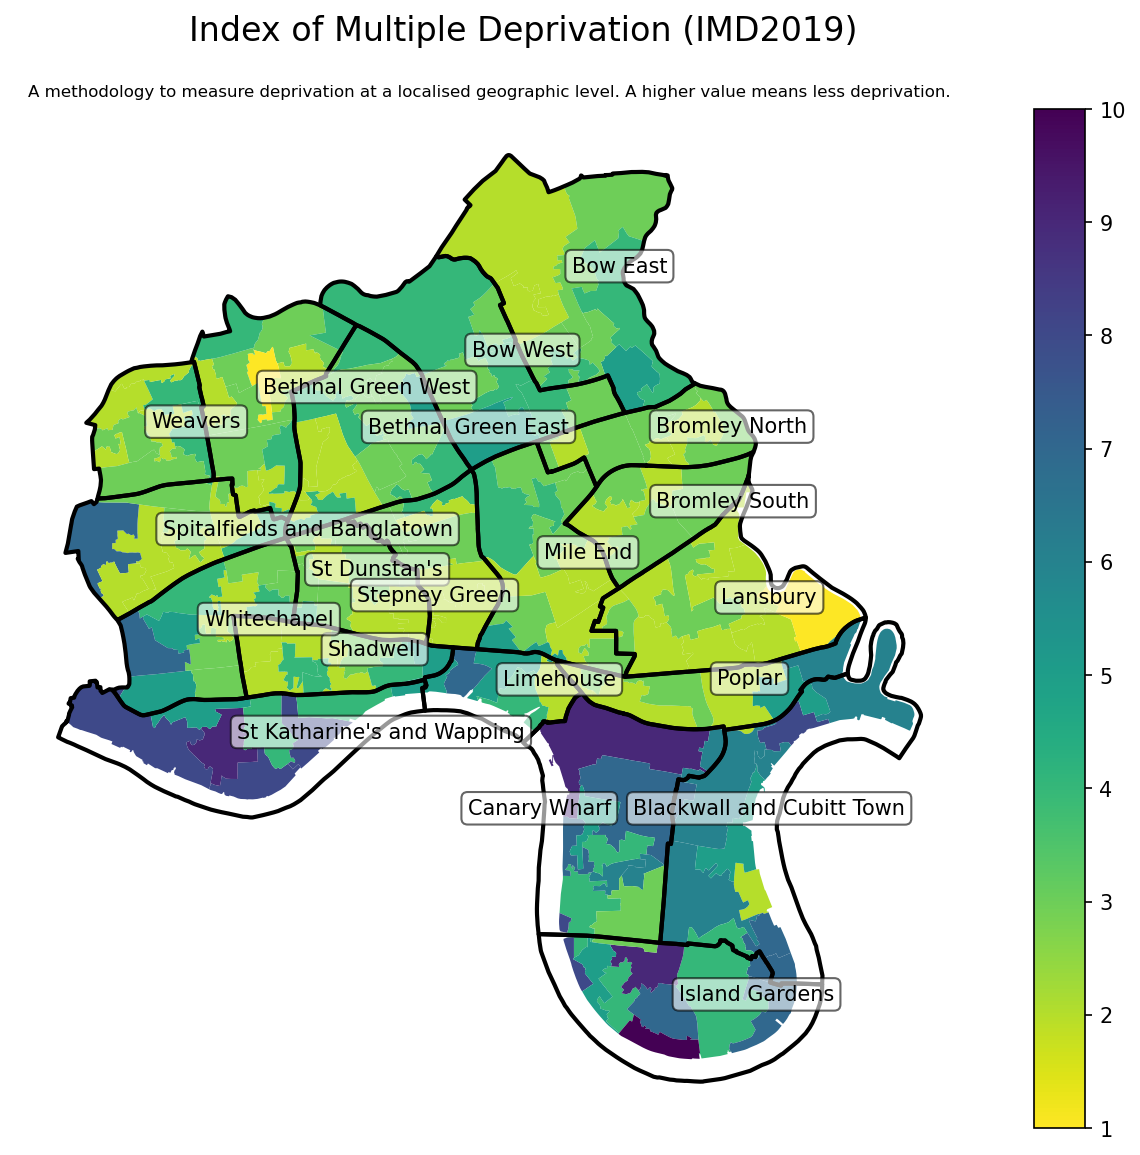

In [17]:
spatialise_data(gdf=gdf_2011, df=imd, left_on='LSOA11CD', right_on='LSOA code (2011)')#.plot(column='Index of Multiple Deprivation (IMD) Decile', legend=True).axis('off')
ax = spatial_plot(
    spatialise_data(gdf=gdf_2011, df=imd, left_on='LSOA11CD', right_on='LSOA code (2011)'),
    column="Index of Multiple Deprivation (IMD) Decile",
    suptitle="Index of Multiple Deprivation (IMD2019)",
    title="A methodology to measure deprivation at a localised geographic level. A higher value means less deprivation.",
    cmap='viridis_r'
)

## DERI 1.5
https://github.com/GreaterManchesterODA/Digital-Exclusion-Risk-Index/

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/GreaterManchesterODA/Digital-Exclusion-Risk-Index/main/Version%201.5/LSOA%20calculations%20and%20scores%20(district%20level)_v1.5.csv")

(<Figure size 1800x1350 with 2 Axes>,
 <AxesSubplot:title={'center':'A methodology to understand the risk of digital exclusion at a localised geographic level. A higher value (lighter colour) represents a higher risk'}>)

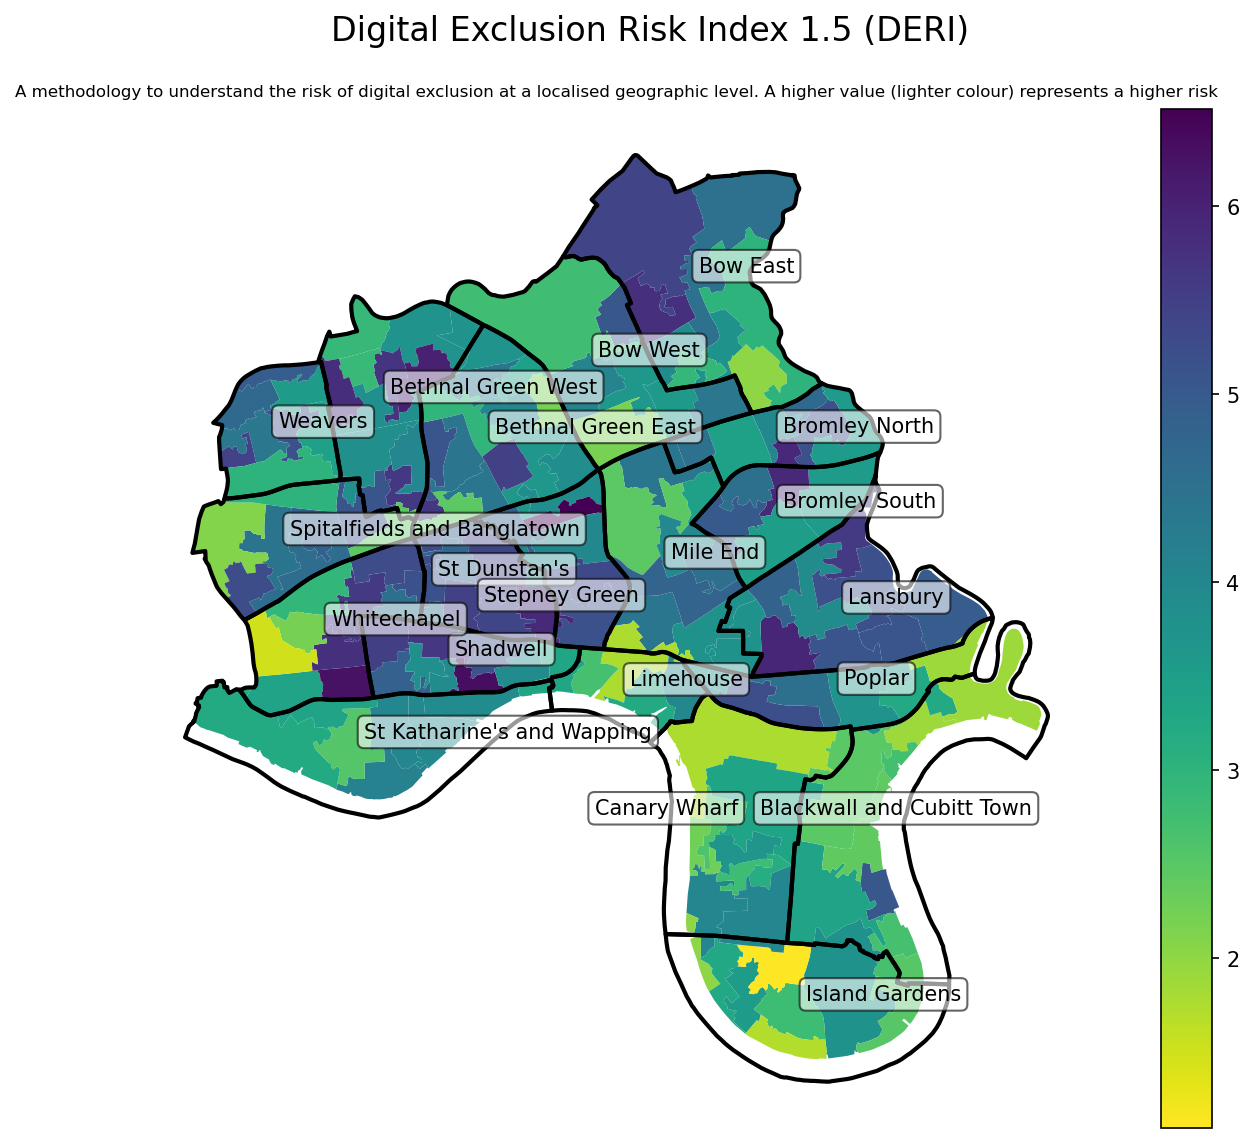

In [19]:
spatial_plot(
    spatialise_data(gdf_2011, df, left_on="LSOA11CD", right_on="LSOA code"),
    column="DERI score (England IMD)",
    suptitle="Digital Exclusion Risk Index 1.5 (DERI)",
    title="A methodology to understand the risk of digital exclusion at a localised geographic level. A higher value (lighter colour) represents a higher risk",
    cmap="viridis_r"
)


Population Density
--

In [20]:
popden_lsoa= pd.read_excel('https://ons-dp-prod-census-publication.s3.eu-west-2.amazonaws.com/TS006_population_density/atc-ts-demmig-ur-pd-oa-lsoa.xlsx',
sheet_name='Table')

(<Figure size 1800x1350 with 2 Axes>, <AxesSubplot:>)

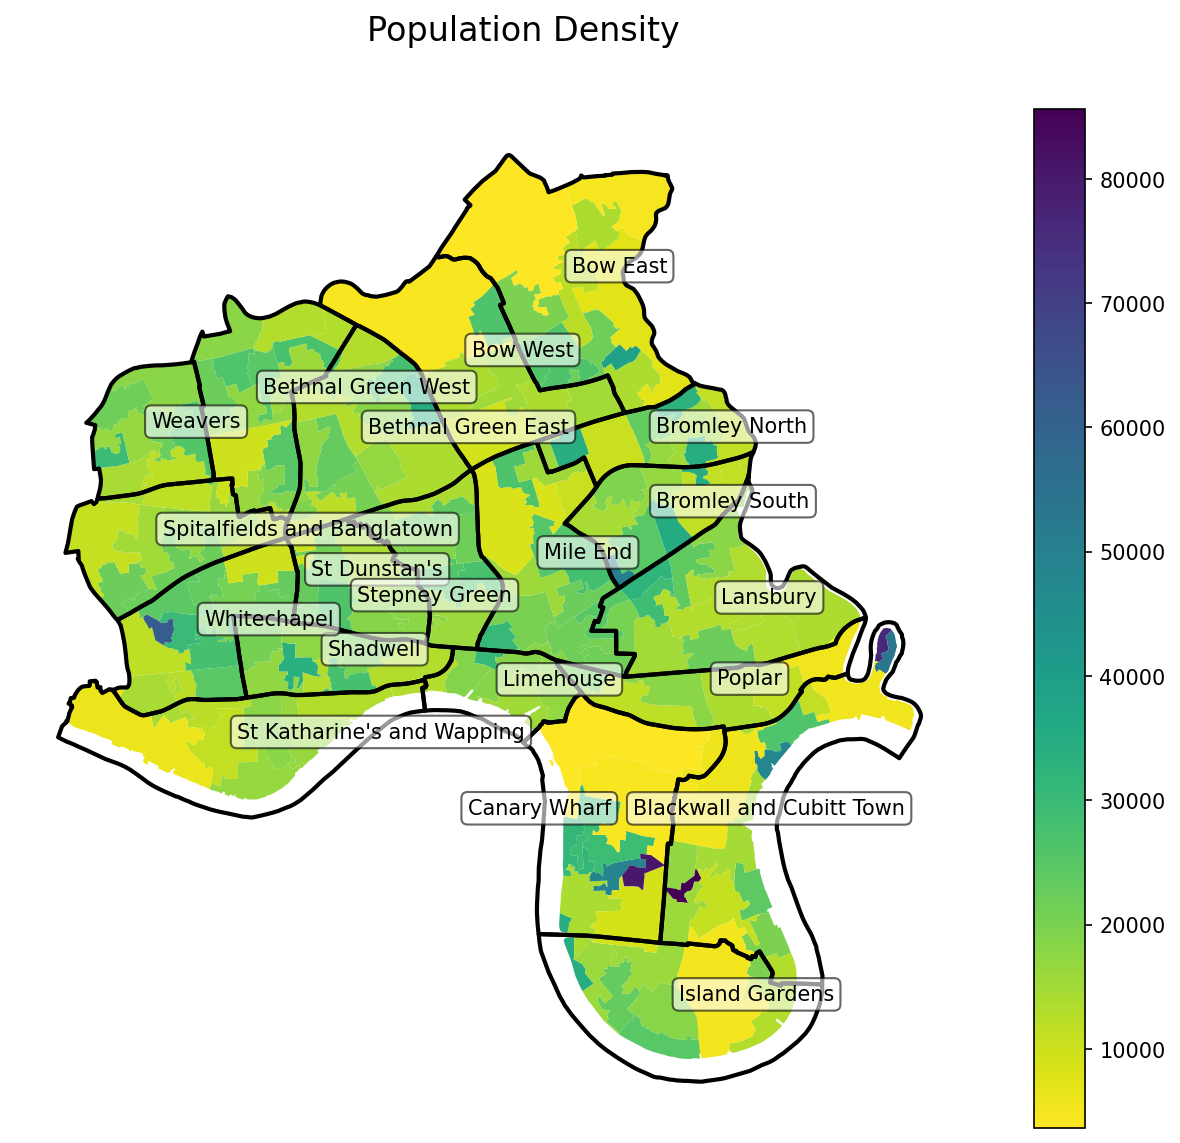

In [21]:
spatial_plot(
    spatialise_data(gdf, popden_lsoa, left_on="LSOA21CD", right_on="Lower Layer Super Output Areas Code"),
    column="Population Density",
    suptitle="Population Density",
    title="",
    cmap="viridis_r"
)


In [22]:
popden_ltla= pd.read_excel('https://ons-dp-prod-census-publication.s3.eu-west-2.amazonaws.com/TS006_population_density/atc-ts-demmig-ur-pd-oa-ltla.xlsx',
sheet_name='Table')

popden_ltla_london=popden_ltla[276:309]

In [23]:
local_authority_gdf=gpd.read_file('https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/LAD_MAY_2022_UK_BFC_V3/FeatureServer/0/query?where=LAD22CD+like+%27E%25%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token=',driver='GeoJSON')

In [24]:
def spatial_plot_2(gdf, suptitle="", title="", column="", cmap="viridis_r"):
    """create an geopandas spatial plot with some default settings

    Args:
        gdf (geodataframe): map of lbth
        suptitle (str, optional): super title. Defaults to ''.
        title (str, optional): title. Defaults to ''.
        column (str, optional): column to plot. Defaults to ''.
        cmap (str, optional): colormap choice. Defaults to "viridis".

    Returns:
        ax: geopandas plot axes

    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150, facecolor="w")
    plt.suptitle(suptitle, fontsize=16, y=0.95)
    plt.title(title, fontsize=8)
    gdf.plot(column=column, cmap=cmap, ax=ax, legend=True,edgecolor='black').axis("off")

    return fig, ax


(<Figure size 1800x1350 with 2 Axes>, <AxesSubplot:>)

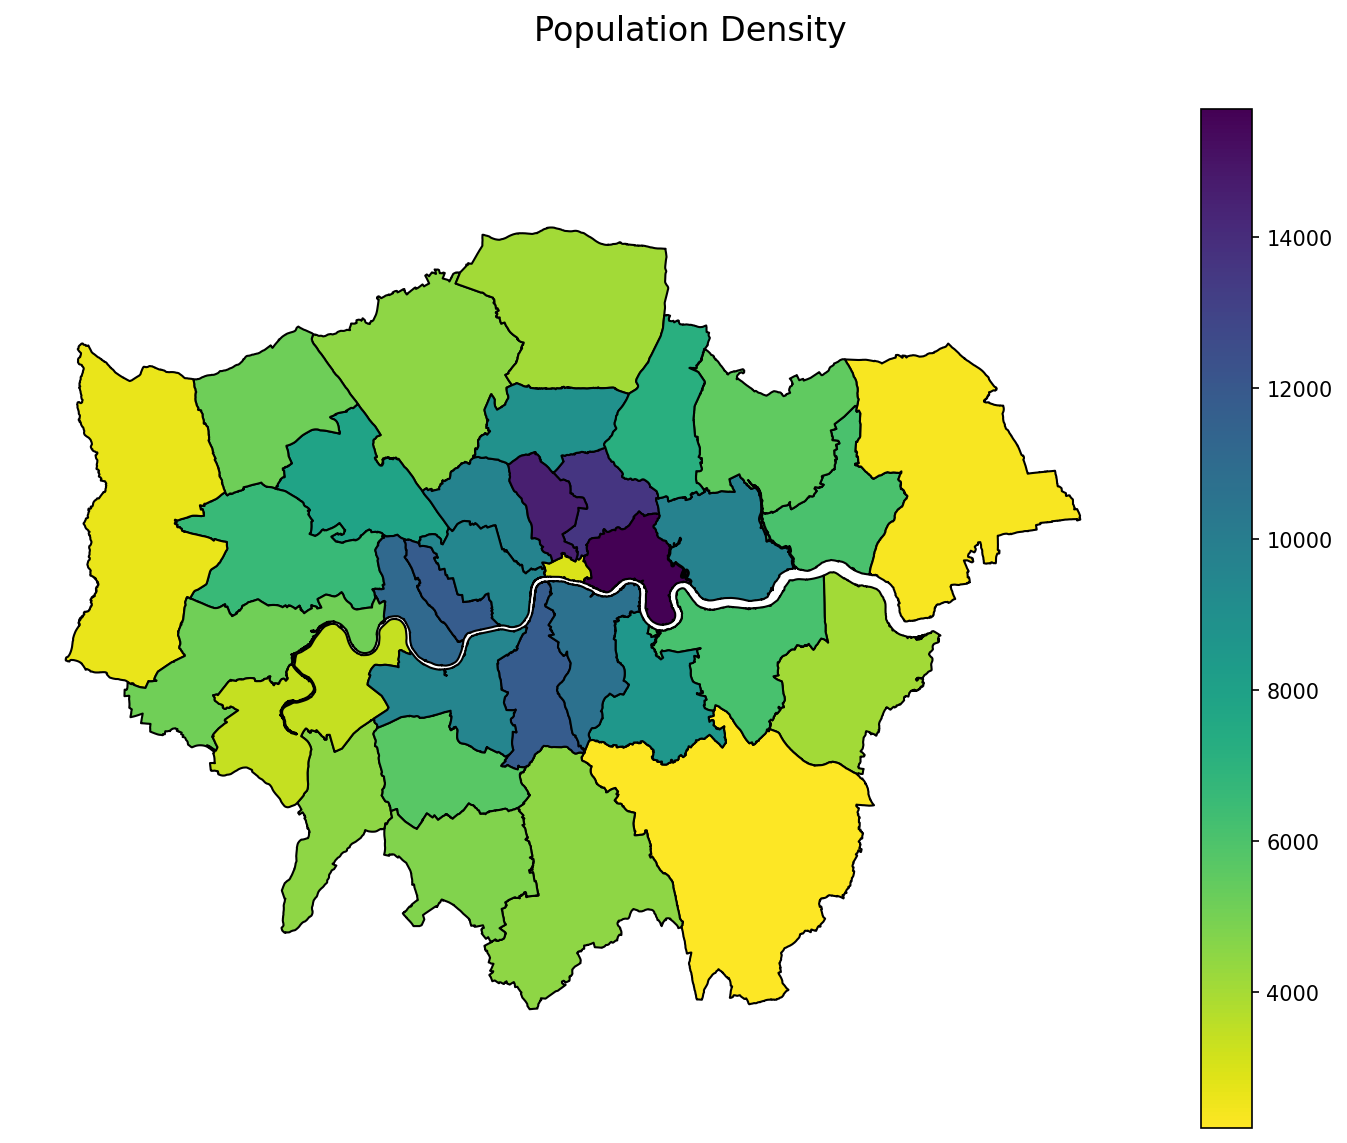

In [25]:
spatial_plot_2(
    spatialise_data(local_authority_gdf, popden_ltla_london, left_on="LAD22CD", right_on="Lower Tier Local Authorities Code"),
    column="Population Density",
    suptitle="Population Density",
    title="",
    cmap="viridis_r"
)


Age
--

In [26]:
age_msoa= pd.read_excel('https://ons-dp-prod-census-publication.s3.eu-west-2.amazonaws.com/TS007_resident_age_101a/UR-msoa%2Bresident_age_101a.xlsx',
sheet_name='Table')

In [27]:
age_msoa_zero_to_four= age_msoa[(age_msoa['Age (101 categories) Label'] =='Aged under 1 year') | (age_msoa['Age (101 categories) Label'] == 'Aged 1 year')| (age_msoa['Age (101 categories) Label'] == 'Aged 2 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 3 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 4 years')]


In [28]:
totals1= age_msoa_zero_to_four.groupby('Middle Layer Super Output Areas Code')['Count'].sum().to_list()

age_msoa_zero_to_four['totals']= np.repeat(totals1,5)

C:\Users\sophie.porton\AppData\Local\Temp\ipykernel_12772\620729730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_msoa_zero_to_four['totals']= np.repeat(totals1,5)


(<Figure size 1800x1350 with 2 Axes>, <AxesSubplot:>)

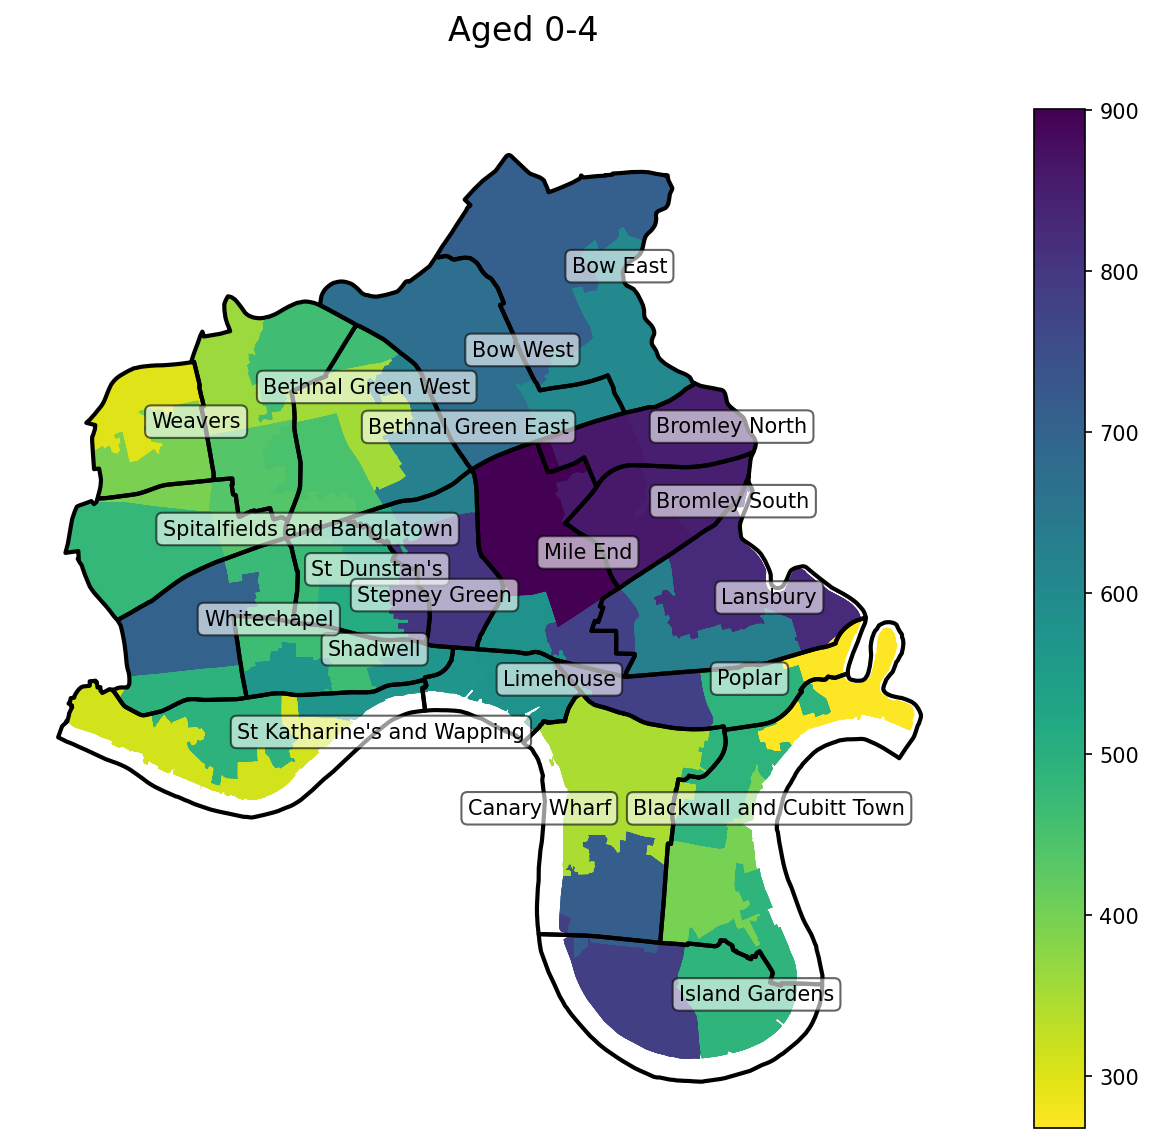

In [29]:
spatial_plot(
    spatialise_data(msoa_gdf, age_msoa_zero_to_four, left_on="MSOA21CD", right_on="Middle Layer Super Output Areas Code"),
    column="totals",
    suptitle="Aged 0-4",
    title="",
    cmap="viridis_r"
)

#need to sum rows of data for each msoa, at the moment only showing one row

In [30]:
age_msoa_primary=age_msoa[(age_msoa['Age (101 categories) Label'] =='Aged 5 years') | (age_msoa['Age (101 categories) Label'] == 'Aged 6 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 7 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 8 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 9 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 10 years')]


In [31]:
totals2= age_msoa_primary.groupby('Middle Layer Super Output Areas Code')['Count'].sum().to_list()

age_msoa_primary['totals']= np.repeat(totals2,6)

C:\Users\sophie.porton\AppData\Local\Temp\ipykernel_12772\1893736573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_msoa_primary['totals']= np.repeat(totals2,6)


(<Figure size 1800x1350 with 2 Axes>, <AxesSubplot:>)

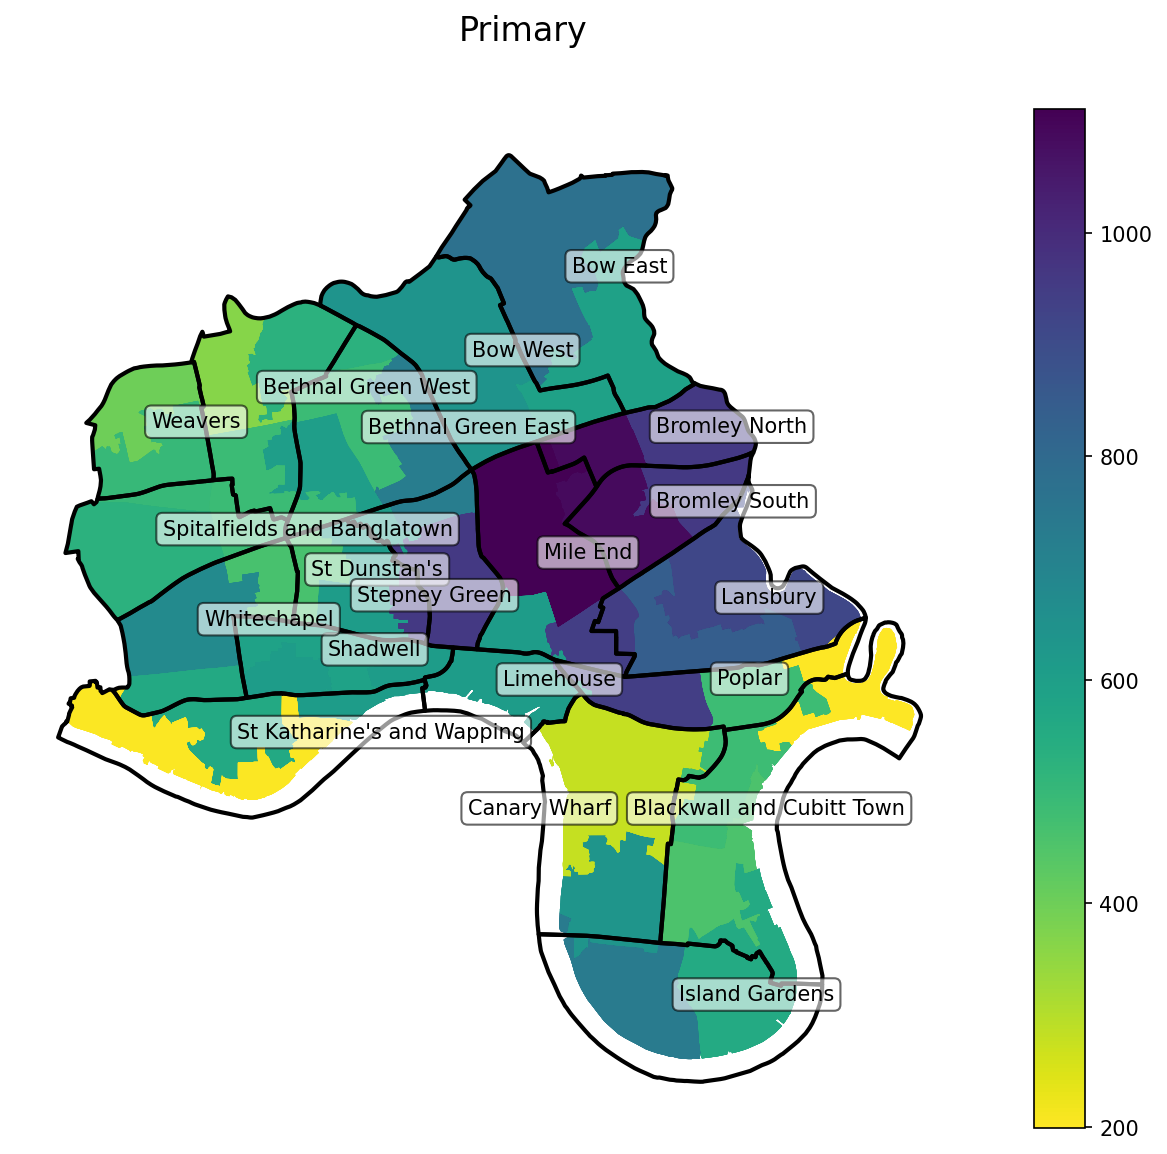

In [32]:
spatial_plot(
    spatialise_data(msoa_gdf, age_msoa_primary, left_on="MSOA21CD", right_on="Middle Layer Super Output Areas Code"),
    column="totals",
    suptitle="Primary",
    title="",
    cmap="viridis_r"
)

In [33]:
age_msoa_secondary=age_msoa[(age_msoa['Age (101 categories) Label'] == 'Aged 11 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 12 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 13 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 14 years')| (age_msoa['Age (101 categories) Label'] == 'Aged 15 years')]

In [34]:
totals3= age_msoa_secondary.groupby('Middle Layer Super Output Areas Code')['Count'].sum().to_list()

age_msoa_secondary['totals']= np.repeat(totals3,5)

C:\Users\sophie.porton\AppData\Local\Temp\ipykernel_12772\927234649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_msoa_secondary['totals']= np.repeat(totals3,5)


(<Figure size 1800x1350 with 2 Axes>, <AxesSubplot:>)

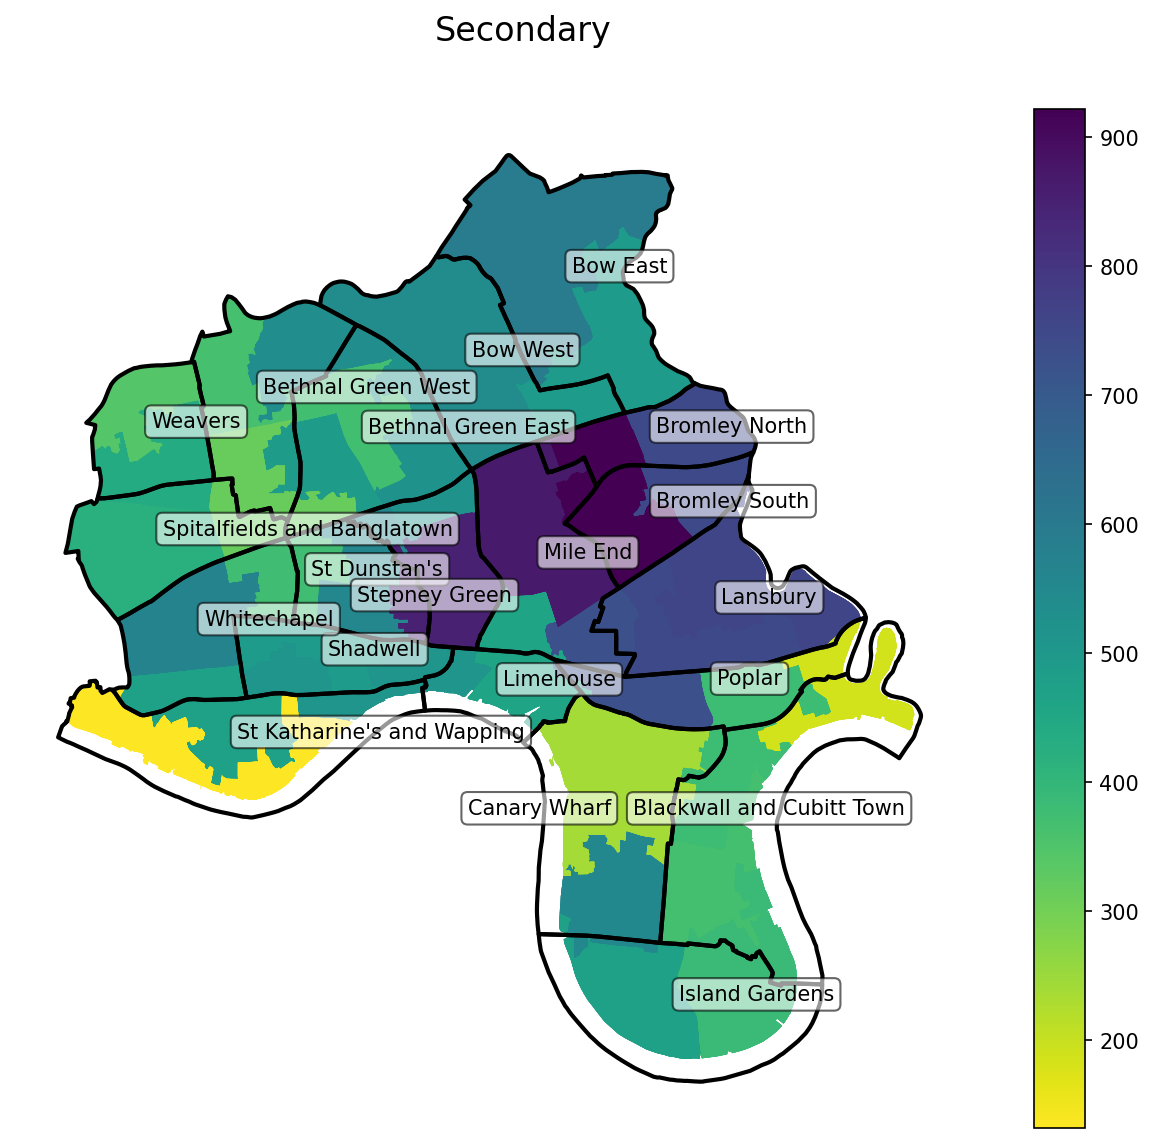

In [35]:
spatial_plot(
    spatialise_data(msoa_gdf, age_msoa_secondary, left_on="MSOA21CD", right_on="Middle Layer Super Output Areas Code"),
    column="totals",
    suptitle="Secondary",
    title="",
    cmap="viridis_r"
)

In [36]:
pattern= '66|67|68|69|70|71|72|73|74|75|76|77|78|79|80|81|82|83|84|85|86|87|88|89|90|91|92|93|94|95|96|97|98|99|100'

age_msoa['sixtysix_plus']= age_msoa['Age (101 categories) Label'].str.contains(pattern,
case=False, na=False)

age_msoa_sixtysix_plus= age_msoa[age_msoa['sixtysix_plus']==True]

In [37]:
totals4= age_msoa_sixtysix_plus.groupby('Middle Layer Super Output Areas Code')['Count'].sum().to_list()

age_msoa_sixtysix_plus['totals']= np.repeat(totals4,35)

C:\Users\sophie.porton\AppData\Local\Temp\ipykernel_12772\1615550437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_msoa_sixtysix_plus['totals']= np.repeat(totals4,35)


(<Figure size 1800x1350 with 2 Axes>, <AxesSubplot:>)

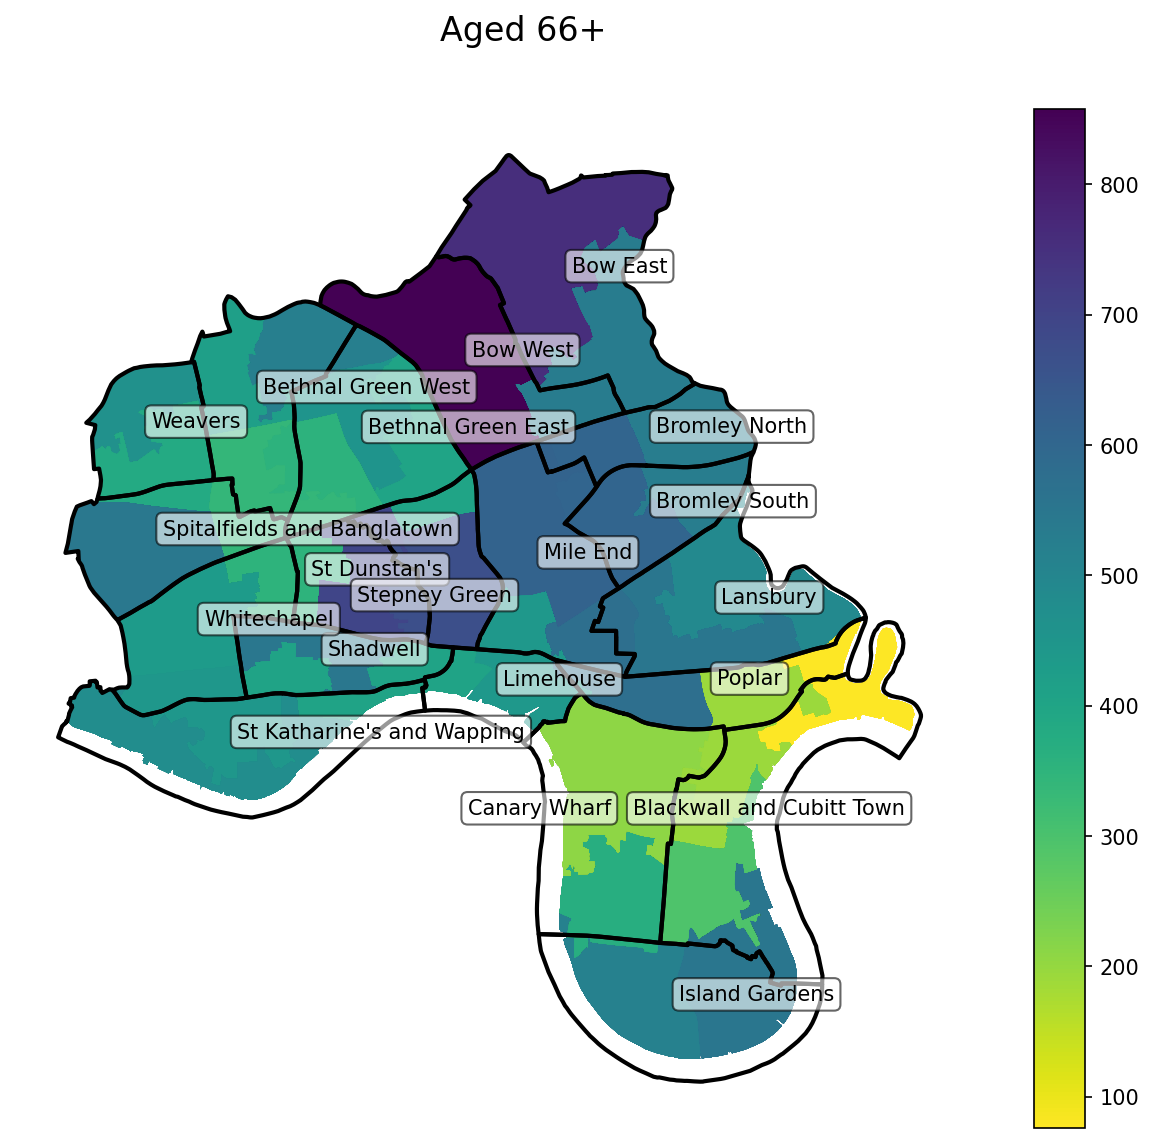

In [38]:
spatial_plot(
    spatialise_data(msoa_gdf, age_msoa_sixtysix_plus, left_on="MSOA21CD", right_on="Middle Layer Super Output Areas Code"),
    column="totals",
    suptitle="Aged 66+",
    title="",
    cmap="viridis_r"
)

Communal establishments
--

In [39]:
communal_establishment_lsoa= pd.read_excel('https://ons-dp-prod-census-publication.s3.eu-west-2.amazonaws.com/TS001_residence_type/atc-ts-demmig-ur-ct-oa-lsoa%2Bresidence_type.xlsx',
sheet_name='Table')

communal_establishment_lsoa_filter= communal_establishment_lsoa[communal_establishment_lsoa['Residence type (2 categories) Code']==2]

(<Figure size 1800x1350 with 2 Axes>, <AxesSubplot:>)

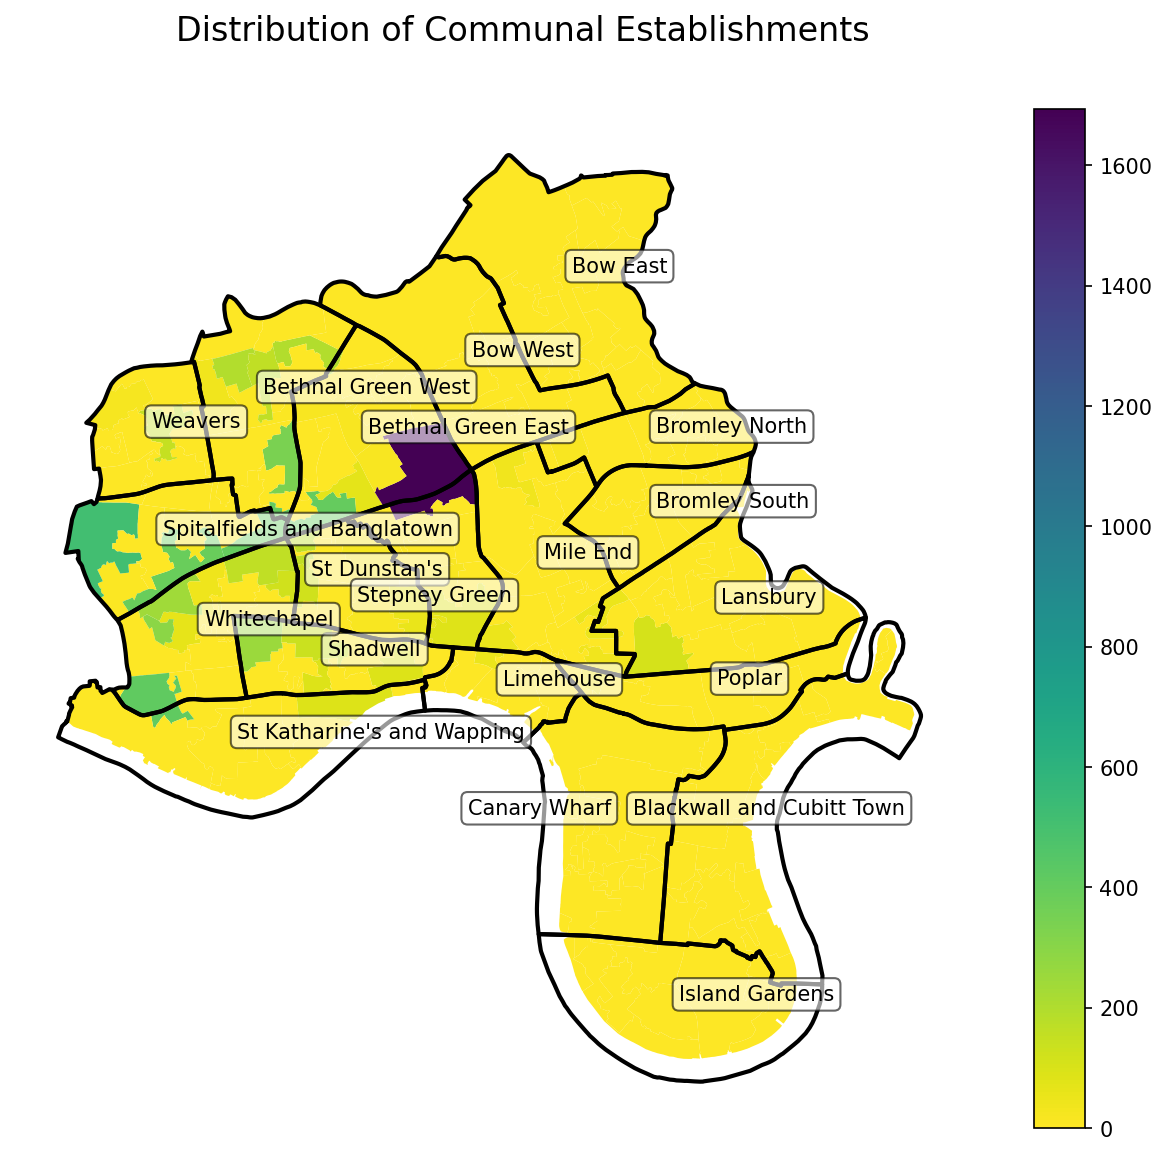

In [40]:
spatial_plot(
    spatialise_data(gdf, communal_establishment_lsoa_filter, left_on="LSOA21CD", right_on="Lower Layer Super Output Areas Code"),
    column="Count",
    suptitle="Distribution of Communal Establishments",
    title="",
    cmap="viridis_r"
)
